# SPAM HAM CLASSIFICATION


### Importing LIBRARIES and loading data 

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

import re
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [2]:
df=pd.read_csv(r"C:\Users\Windows\Desktop\spam-ham\combined_data.csv")

In [3]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [6]:
print(df.shape)
print(df.dtypes)

(83448, 2)
label     int64
text     object
dtype: object


### Let's see class distribution

([<matplotlib.axis.XTick at 0x2dca9525bb0>,
 [Text(0, 0, 'HAM'), Text(1, 0, 'SPAM')])

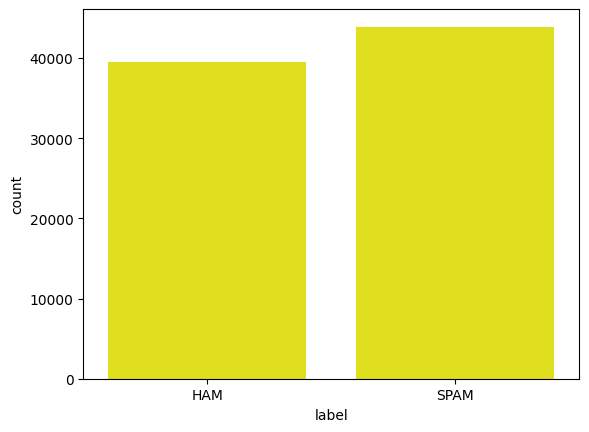

In [10]:
sns.countplot(x='label', data=df ,color='Yellow')
plt.xticks([0,1],['HAM','SPAM'])

### OUR DATA IS ALMOST BALANCED ! 

## TEXT PREPROCESSING

In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
x=df['text']
y=df['label']

In [20]:
X_train , X_test, y_train , y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
X_train.shape ,y_train.shape,X_test.shape ,y_test.shape

((58413,), (58413,), (25035,), (25035,))

In [37]:
def text_preprocessor(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


from sklearn.base import BaseEstimator, TransformerMixin

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [text_preprocessor(text) for text in X]

In [38]:
pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),  # Custom text preprocessor
    ('vectorizer', CountVectorizer()),     # Convert text to numeric features
    ('model', MultinomialNB())             # Naive Bayes model
])

In [50]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor', TextPreprocessor()),
                ('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [51]:
y_pred=pipeline.predict(X_test)

In [52]:
# Training set accuracy
train_accuracy = pipeline.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.98


In [53]:
# Test set accuracy
test_accuracy = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.98


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[11685   133]
 [  490 12727]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     11818
           1       0.99      0.96      0.98     13217

    accuracy                           0.98     25035
   macro avg       0.97      0.98      0.98     25035
weighted avg       0.98      0.98      0.98     25035



In [56]:
with open('spam_ham_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [57]:
with open('spam_ham_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)


In [ ]:
# Hardcoded input (e.g., a spam message and a ham message)
input_message_spam = "Congratulations! You've won a free ticket to the Bahamas! Claim your prize now."
input_message_ham = "Hello, just wanted to check if you're available for a meeting tomorrow at 10 AM."


In [ ]:
# Pass the input through the pipeline and get the prediction
pred_spam = pipeline.predict([input_message_spam])
pred_ham = pipeline.predict([input_message_ham])


In [49]:
# Display the results
print(f"Input: {input_message_spam}")
print(f"Prediction (1 = Spam, 0 = Ham): {pred_spam[0]}")
print("\n")

print(f"Input: {input_message_ham}")
print(f"Prediction (1 = Spam, 0 = Ham): {pred_ham[0]}")

Input: Congratulations! You've won a free ticket to the Bahamas! Claim your prize now.
Prediction (1 = Spam, 0 = Ham): 1


Input: Hello, just wanted to check if you're available for a meeting tomorrow at 10 AM.
Prediction (1 = Spam, 0 = Ham): 0
